In [37]:
import pandas as pd

"""We have specified index_col to be 0 since we want the country names to be the
row labels. We also specified the thousands separator to be ',' so Pandas
automatically parses cells as numbers. We can use head() to check the first
few lines."""

In [38]:
existing_df = pd.read_csv("Project_Data_2.csv", 
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

"""In this section, we want to be able to represent each country in a two dimensional 
space. In our dataset, each sample is a country defined by 18 different variables, 
each one corresponding to sales of wheat (in tons) for a given year from 1990 to 2007.
These variables represent not just the total counts or average in the 1990-2007 range 
but also all the variation in the time series and relationships within countries in a 
given year. By using PCA we will be able to reduce these 18 variables to just the two 
of them that best captures that information.In order to do so, we will first how to 
perform PCA and plot the first two PCs in Python. We will close the section by
analysing the resulting plot and each of the two PCs."""

In [39]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


"""Pythons sklearn machine learning library implementation uses the scipy.linalg 
implementation of the singular value decomposition. It only works for dense arrays 
and is not scalable to large dimensional data. For large dimensional data we should 
consider something such as Spark's dimensionality reduction features. 
In our case we just have 18 variables, and that is far from being a large number of
features for today's machine learning libraries and computer capabilities.When using 
this implementation of PCA we need to specify in advance the number of principal 
components we want to use. Then we can just call the fit() method
with our data frame and check the results."""

In [40]:
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=2)
#kmeanModel.fit(reduced_features_df)
kmeanModel.fit_predict(existing_df)

# cluster center vectors
print(kmeanModel.cluster_centers_)
print(kmeanModel.labels_)
print(len(kmeanModel.labels_))
#df['clusters'] = kmeanModel.labels_
#print(df['clusters'])

[[469.15625    468.21875    463.125      458.671875   454.609375
  451.71875    429.671875   430.15625    427.046875   439.8125
  445.03125    450.828125   447.15625    453.234375   447.046875
  442.828125   437.765625   435.90625   ]
 [ 75.14685315  74.84615385  71.83216783  71.45454545  69.72727273
   69.88811189  66.66433566  69.45454545  66.71328671  64.40559441
   57.7972028   55.6013986   59.73426573  52.51048951  51.68531469
   49.60839161  48.74125874  47.02097902]]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0]
207


In [ ]:
1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1

In [29]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

"""This gives us an object we can use to transform our data by calling transform."""

In [30]:
existing_2d = pca.transform(existing_df)

"""As a result of this we end up with a lower dimension representation of our 
dataframe, as a numPy array. Let's put it in a new data frame."""

In [31]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


"""We can also print the explained variance ratio as follows."""

In [32]:
print(pca.explained_variance_ratio_) 

[0.91808789 0.060556  ]


In [33]:
print(existing_df.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam',
       'Wallis et Futuna', 'West Bank and Gaza', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=207)


In [34]:
print(existing_df_2d.iloc[1])

PC1   -613.296510
PC2      4.715978
Name: Albania, dtype: float64


"""As you can see this explains nearly 97.8 % variance in the dataset. 
That is why we have chosen 2 PCs """

In [35]:
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=2)
#kmeanModel.fit(reduced_features_df)
kmeanModel.fit_predict(existing_df_2d)

# cluster center vectors
print(kmeanModel.cluster_centers_)
print(kmeanModel.labels_)
print(len(kmeanModel.labels_))
#df['clusters'] = kmeanModel.labels_
#print(df['clusters'])

[[-504.8687494    16.46834969]
 [1128.06611193  -36.79646885]]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1]
207


"""Now we are ready to plot the lower dimensionality version of our dataset. 
We just need to call plot on the data frame, by passing the kind of plot we
want and what columns correspond to each axis. 
We also add an annotation loop that tags every point with its country name."""

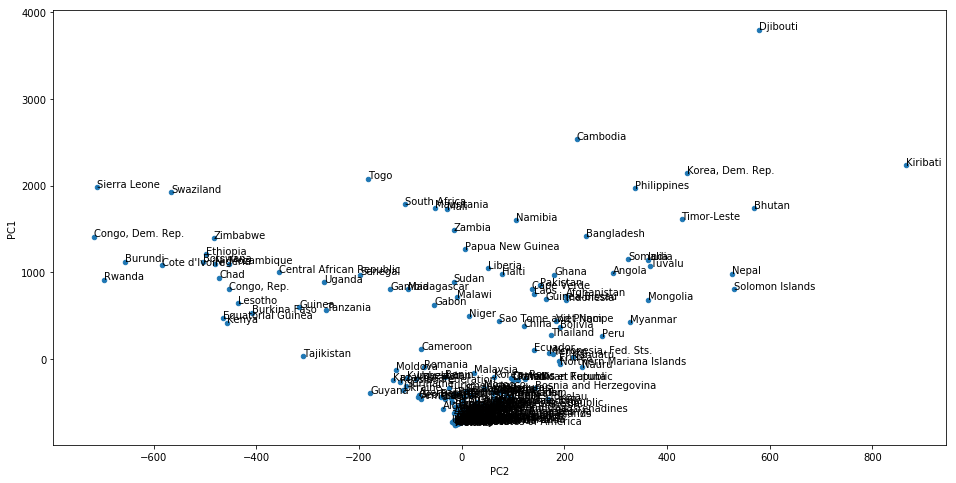

In [15]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(existing_df.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

"""Let's now create a bubble chart, by setting the point size to a value 
proportional to the mean value for all the years in that particular country.
First we need to add a new column containing the re-scaled mean per country 
across all the years. And then we can plot using variable size"""

In [16]:
from sklearn.preprocessing import normalize
    
existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1),index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(country_mean_scaled,index=existing_df_2d.index) 
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


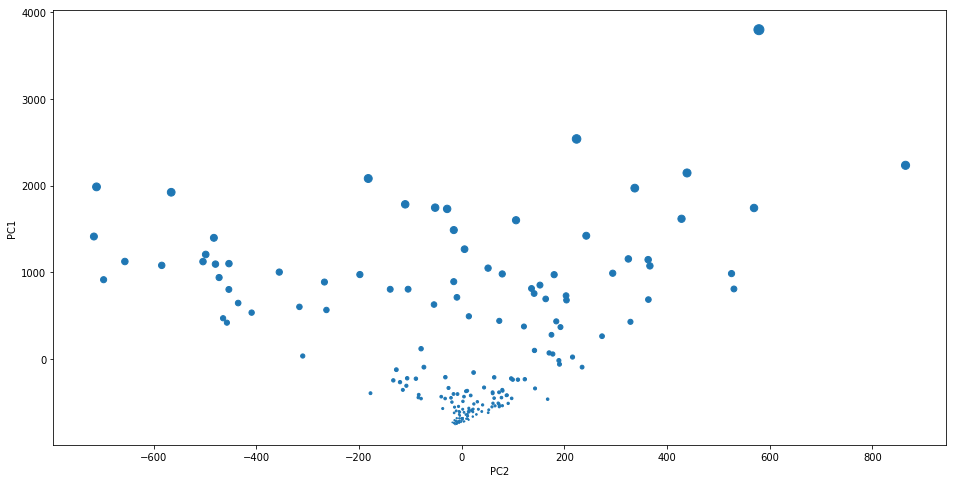

In [17]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

"""Let's do the same with the sum instead of the mean."""

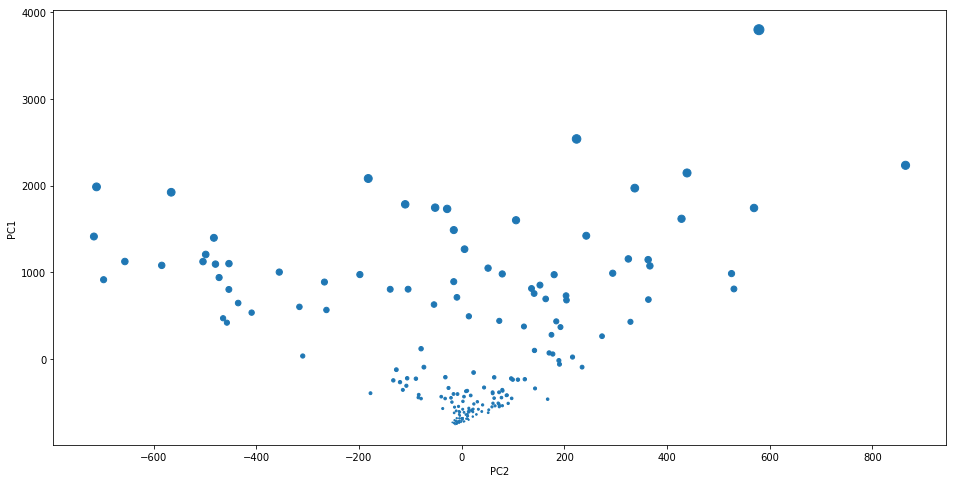

In [18]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled =(existing_df_2d.country_sum-country_sum_min)/country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

"""And finally let's associate the size with the change between 1990 and 2007. 
Note that in the scaled version, those values close to zero will make reference
to those with negative values in the original non-scaled version, since we are 
scaling to a [0,1] range."""

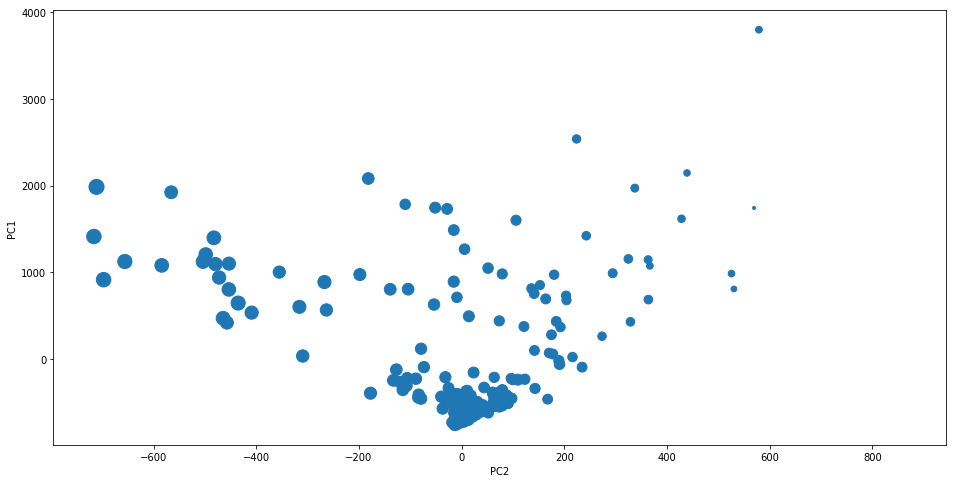

In [19]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

"""Now lets explore the clustering ( K Means ) to see how similar the 
situation has been year over year"""

"""That is, we will cluster the data based in the 18 variables that we have.
Then we will use the cluster assignment to colour the previous 2D chart, in 
order to discover hidden relationship within our data and better understand 
the world situation regarding the sales of wheat.When using k-means, we need 
to determine the right number of groups for our case. This can be done more 
or less accurately by iterating through different values for the number of 
groups and compare an amount called the within-cluster sum of square distances
for each iteration. This is the squared sum of distances to the cluster center 
for each cluster member. Of course this distance is minimal when the number of 
clusters gets equal to the number of samples, but we don't want to get there. 
We normally stop when the improvement in this value starts decreasing at a lower
rate."""

In [20]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)


"""Now we need to store the cluster assignments together with each country
in ourdata frame. The cluster labels are returned in clusters.labels_."""

In [21]:
existing_df_2d['cluster']=pd.Series(clusters.labels_, index=existing_df_2d.index)

In [22]:
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731,6360,0.329731,-198,0.850840,4
Albania,-613.296510,4.715978,36.944444,0.032420,665,0.032420,-20,1.224790,3
Algeria,-569.303713,-36.837051,47.388889,0.042234,853,0.042234,11,1.289916,3
American Samoa,-717.082766,5.464696,12.277778,0.009240,221,0.009240,-37,1.189076,3
Andorra,-661.802241,11.037736,25.277778,0.021457,455,0.021457,-20,1.224790,3


"""And now we are ready to plot, using the cluster column as color."""

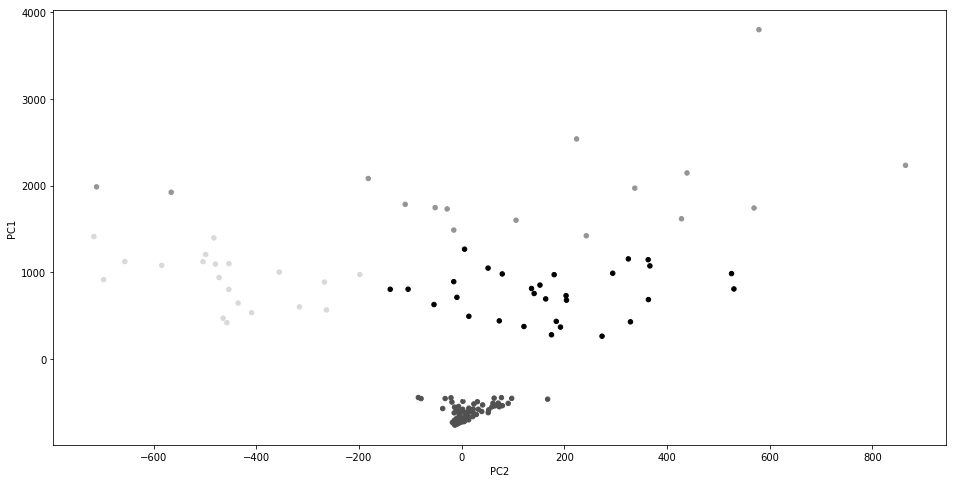

In [23]:
import numpy as np
    
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(16,8))

"""Now put back the cluster number in the dataframe for each country 
so as to see which countries need to be grouped together"""

"""And check which countries are there in cluster 1."""